In [3]:
'''----------------------------------- IMPORT PACKAGES ----------------------------------------------------'''
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True


In [1]:
'''----------------------------------- PATHS ----------------------------------------------------'''
Figure_Name = "SWOPC_IOP1_08_04_2021"
Data_file = "SWOPC_08_03_2021_1716UTC.csv"
Data_path = "C:/Users/tjmor/OneDrive/Research/Projects/Oregon_Carrot/Data/IOP1/SWOPC/"


In [4]:
'''----------------------------------- Load Data ----------------------------------------------------'''
df = pd.read_csv(Data_path + Data_file,skiprows=13)

In [5]:
'''----------------------------------- Convert Excel Time ----------------------------------------------------'''

def read_date(date):
    return xlrd.xldate.xldate_as_datetime(date, 0)

df['Time'] = pd.to_datetime(df['OADateTime'].apply(read_date), errors='coerce')
df = df.set_index('Time')
df = df.loc['2021-08-03 22:30:00':'2021-08-03 23:20:00']
df.index = df.index+ pd.Timedelta(hours=1)
'''----------------------------------- Take average of data ----------------------------------------------------'''
df_1min = df.resample(rule = '1Min').mean() #Note that rolling values look the same~ so we will use these for now

print(df.index[1])
print(df.index[-1]) #Print last time so we can name the figure

2021-08-03 23:30:01.530000
2021-08-04 00:20:00.223000


<ipython-input-5-d87be345b2f3>:8: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df = df.loc['2021-08-03 22:30:00':'2021-08-03 23:20:00']


In [6]:
'''----------------------------------------------PLOT SETTINGS ------------------------------------------------------'''
plt.style.use('seaborn-colorblind') # Color Scheme for plots
plt.rcParams["font.family"] = "Times New Roman" # Font style
plt.rcParams.update({'font.size': 16}) #Set font size


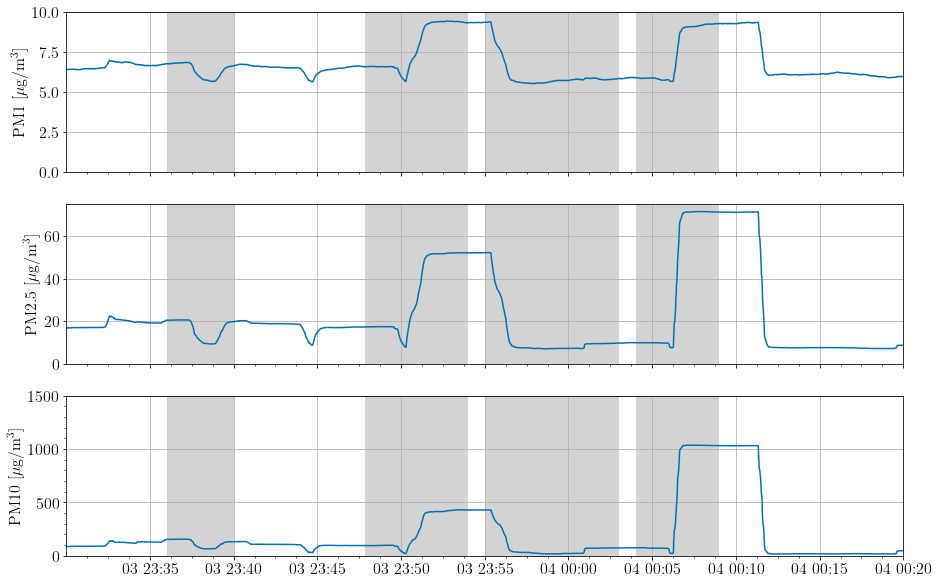

In [7]:
'''---------------------------------------------- FIGURE 1 ------------------------------------------------------'''
ymax = 1500
#Figure 1 ~ PM1, PM2.5, and PM10
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(15, 10))

ax1.plot(df.index, df['RollMean_PM1'])
ax1.set(ylabel = r'PM1 [$\mu$g/m$^3$]')
ax1.grid(b=bool, which='major', axis='both')
ax1.autoscale(enable=True, axis='x', tight=True)
ax1.set_ylim(0, 10)
ax1.fill_between((df.index[355],df.index[355], df.index[591],df.index[591]), [0, 10, 10, 0],facecolor = 'lightgray') #IOP1 Pass 1
ax1.fill_between((df.index[1054],df.index[1054], df.index[1419],df.index[1419]), [0, 10, 10, 0],facecolor = 'lightgray') #IOP1 Pass 2
ax1.fill_between((df.index[1478],df.index[1478], df.index[1951],df.index[1951]), [0, 10, 10, 0],facecolor = 'lightgray') #IOP1 Pass 3
ax1.fill_between((df.index[2010],df.index[2010], df.index[2305],df.index[2305]), [0, 10, 10, 0],facecolor = 'lightgray') #IOP1 Pass 4

ax2.plot(df.index, df['RollMean_PM2.5'])
ax2.set(ylabel = r'PM2.5 [$\mu$g/m$^3$]')
ax2.grid(b=bool, which='major', axis='both')
ax2.autoscale(enable=True, axis='x', tight=True)
ax2.set_ylim(0, 75)
ax2.fill_between((df.index[355],df.index[355], df.index[591],df.index[591]), [0, 75, 75, 0],facecolor = 'lightgray') #IOP1 Pass 1
ax2.fill_between((df.index[1054],df.index[1054], df.index[1419],df.index[1419]), [0, 75, 75, 0],facecolor = 'lightgray') #IOP1 Pass 2
ax2.fill_between((df.index[1478],df.index[1478], df.index[1951],df.index[1951]), [0, 75, 75, 0],facecolor = 'lightgray') #IOP1 Pass 3
ax2.fill_between((df.index[2010],df.index[2010], df.index[2305],df.index[2305]), [0, 75, 75, 0],facecolor = 'lightgray') #IOP1 Pass 4

ax3.plot(df.index, df['RollMean_PM10'])
ax3.set(ylabel = r'PM10 [$\mu$g/m$^3$]')
ax3.grid(b=bool, which='major', axis='both')
ax3.autoscale(enable=True, axis='x', tight=True)
ax3.set_ylim(0, 1500)
ax3.fill_between((df.index[355],df.index[355], df.index[591],df.index[591]), [0, ymax, ymax, 0],facecolor = 'lightgray') #IOP1 Pass 1
ax3.fill_between((df.index[1054],df.index[1054], df.index[1419],df.index[1419]), [0, ymax, ymax, 0],facecolor = 'lightgray') #IOP1 Pass 2
ax3.fill_between((df.index[1478],df.index[1478], df.index[1951],df.index[1951]), [0, ymax, ymax, 0],facecolor = 'lightgray') #IOP1 Pass 3
ax3.fill_between((df.index[2010],df.index[2010], df.index[2305],df.index[2305]), [0, ymax, ymax, 0],facecolor = 'lightgray') #IOP1 Pass 4

plt.minorticks_on()
#save figure
plt.savefig('../gen/' + Figure_Name +'.png', bbox_inches='tight')
